<a href="https://colab.research.google.com/github/abhinavnautiyalDS/Finwise-GenAI-Assistant/blob/main/finwise-genai-capstone/task-01-chatbot-memory/Task_1_chatbox_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

Install required packages


In [5]:
!pip install -qU langchain langchain-google-genai gradio


Importing Required Libraries

In [6]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory
from google.colab import userdata
import gradio as gr

Getting Api key from colab secrets

In [7]:

api_key = userdata.get('GOOGLE_API_KEY')


# defining model
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    google_api_key=api_key,
    temperature=0.7
)

# Set up conversation memory
memory = ConversationBufferMemory()

# Create a conversational chain with memory
conversation = ConversationChain(
    llm=llm,
    memory=memory,
    verbose=False  # Set to True to see internal chain details
)

# Define the chatbot function for Gradio

def chatbot(user_input, history=[]):
    # Get response from the conversation chain
    response = conversation.predict(input=user_input)
    # Append to history (Gradio expects [user, bot] pairs)
    history.append([user_input, response])
    return history, history

# Create Gradio interface
with gr.Blocks() as interface:
    gr.Markdown("# Gemini Pro Chatbot with Memory")
    gr.Markdown("Ask anything, and I'll remember our conversation!")
    chatbot_component = gr.Chatbot(label="Conversation")
    user_input = gr.Textbox(label="Your Message", placeholder="Type here...")
    submit_button = gr.Button("Send")

    # Link button to chatbot function
    submit_button.click(
        fn=chatbot,
        inputs=[user_input, chatbot_component],
        outputs=[chatbot_component, chatbot_component]
    )


#launching gradio app
interface.launch(share=False)  # share=True for public link (Colab Pro recommended)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

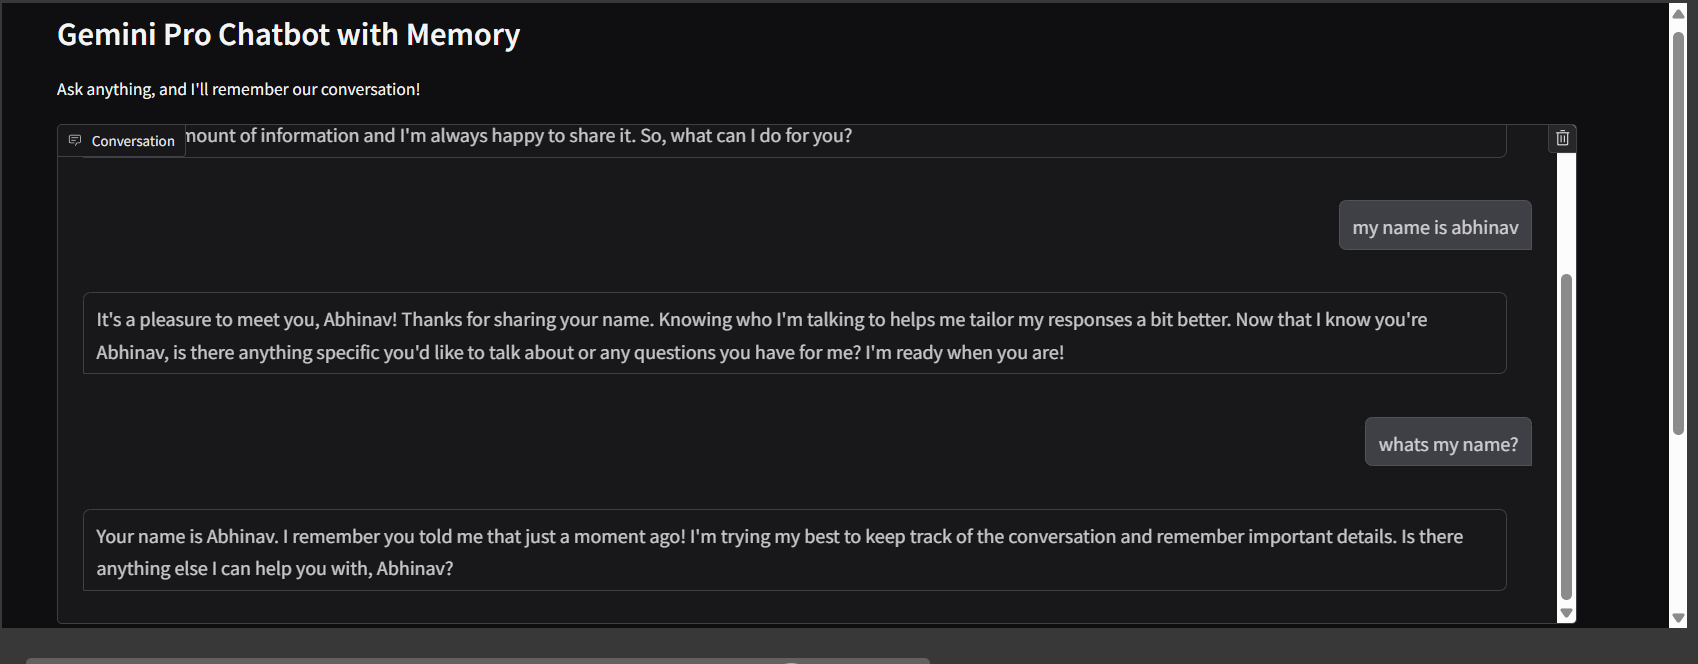